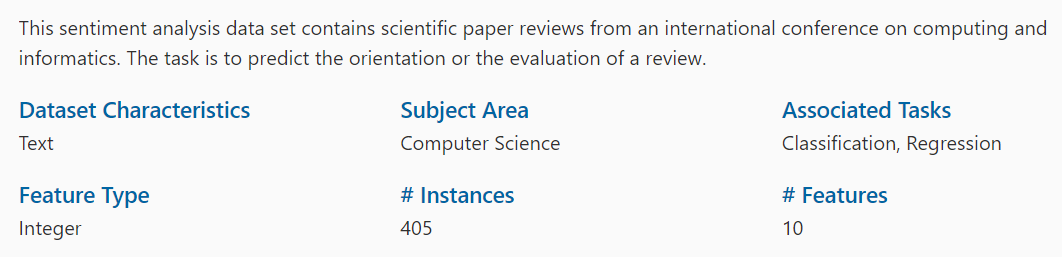

# **From JSON to pandas Dataframe**

In [ ]:
import pandas as pd
import json
import numpy as np
from numpy import mean,std
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')



with open("/content/drive/MyDrive/MAGISTRALE/MACHINE_LEARNING-2023/Tesina/reviews.json") as f:
    data = json.load(f)
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data["paper"], "review",["paper_id","preliminary_decision"])
# Rename the columns for clarity
df.columns = ['Confidence','Evaluation','Review_ID','Language','Orientation','Remarks','Text','Timespan','Paper_ID','Preliminary_decision']



# **EDA** and **PREPROCESSING**

In [ ]:
# Display the DataFrame
print(df.head())
print(df.info())
print(df.shape)

  Confidence Evaluation  Review_ID Language Orientation Remarks  \
0          4          1          1       es           0           
1          4          1          2       es           1           
2          5          1          3       es           1           
3          4          2          1       es           1           
4          4          2          2       es           0           

                                                Text    Timespan Paper_ID  \
0  - El artículo aborda un problema contingente y...  2010-07-05        1   
1  El artículo presenta recomendaciones prácticas...  2010-07-05        1   
2  - El tema es muy interesante y puede ser de mu...  2010-07-05        1   
3  Se explica en forma ordenada y didáctica una e...  2010-07-05        2   
4                                                     2010-07-05        2   

  Preliminary_decision  
0               accept  
1               accept  
2               accept  
3               accept  
4        

In [ ]:
#Drop the rows null
print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()
#Drop the feature that have unique value
df = df.drop("Paper_ID",axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
display(df.info())

Confidence              2
Evaluation              0
Review_ID               0
Language                0
Orientation             0
Remarks                 0
Text                    0
Timespan                0
Paper_ID                0
Preliminary_decision    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Confidence            403 non-null    object
 1   Evaluation            403 non-null    object
 2   Review_ID             403 non-null    int64 
 3   Language              403 non-null    object
 4   Orientation           403 non-null    object
 5   Remarks               403 non-null    object
 6   Text                  403 non-null    object
 7   Timespan              403 non-null    object
 8   Preliminary_decision  403 non-null    object
dtypes: int64(1), object(8)
memory usage: 28.5+ KB


None

In [ ]:
#Check if Evaluation values are in [-2,2]
df['Evaluation'] = pd.to_numeric(df['Evaluation'])
print(df['Evaluation'].isin([-2,-1,0,1,2]))

0      True
1      True
2      True
3      True
4      True
       ... 
398    True
399    True
400    True
401    True
402    True
Name: Evaluation, Length: 403, dtype: bool


In [ ]:
#Check if Orientation values are in [-2,2]
df['Orientation'] = pd.to_numeric(df['Orientation'])
print(df['Orientation'].isin([-2,-1,0,1,2]))

0      True
1      True
2      True
3      True
4      True
       ... 
398    True
399    True
400    True
401    True
402    True
Name: Orientation, Length: 403, dtype: bool


In [ ]:
#Convert Confidence to numeric value and check if the values are in [1,5]
df['Confidence']= pd.to_numeric(df['Confidence'])
print(df['Confidence'].isin([1,2,3,4,5]))

0      True
1      True
2      True
3      True
4      True
       ... 
398    True
399    True
400    True
401    True
402    True
Name: Confidence, Length: 403, dtype: bool


In [ ]:
#Check if Remark values are empty and replace it empty = 0, otherwise = 1
print("String value empty in the Remarks column are: " ,df['Remarks'].eq("").sum())
df['Remarks'] = df['Remarks'].replace("",0)
df['Remarks'][df[df['Remarks'].values!=0].index] = 1
print("String value full in the Remarks column are: " ,df['Remarks'].eq(1).sum())
df['Remarks'] = pd.to_numeric(df['Remarks'])

String value empty in the Remarks column are:  292
String value full in the Remarks column are:  111


**TIMESPAN FEATURE**

In [ ]:
#Dummizzation of Timespan feature
df['Timespan'] =  pd.to_datetime(df['Timespan'])
timespan_dummies = pd.get_dummies(df['Timespan'])
timespan_dummies.columns = ['2010','2013','2014','2015']

df = df.drop('Timespan',axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
df = pd.concat([df,timespan_dummies],axis=1)
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Confidence            403 non-null    int64 
 1   Evaluation            403 non-null    int64 
 2   Review_ID             403 non-null    int64 
 3   Language              403 non-null    object
 4   Orientation           403 non-null    int64 
 5   Remarks               403 non-null    int64 
 6   Text                  403 non-null    object
 7   Preliminary_decision  403 non-null    object
 8   2010                  403 non-null    uint8 
 9   2013                  403 non-null    uint8 
 10  2014                  403 non-null    uint8 
 11  2015                  403 non-null    uint8 
dtypes: int64(5), object(3), uint8(4)
memory usage: 26.9+ KB
None
(403, 12)


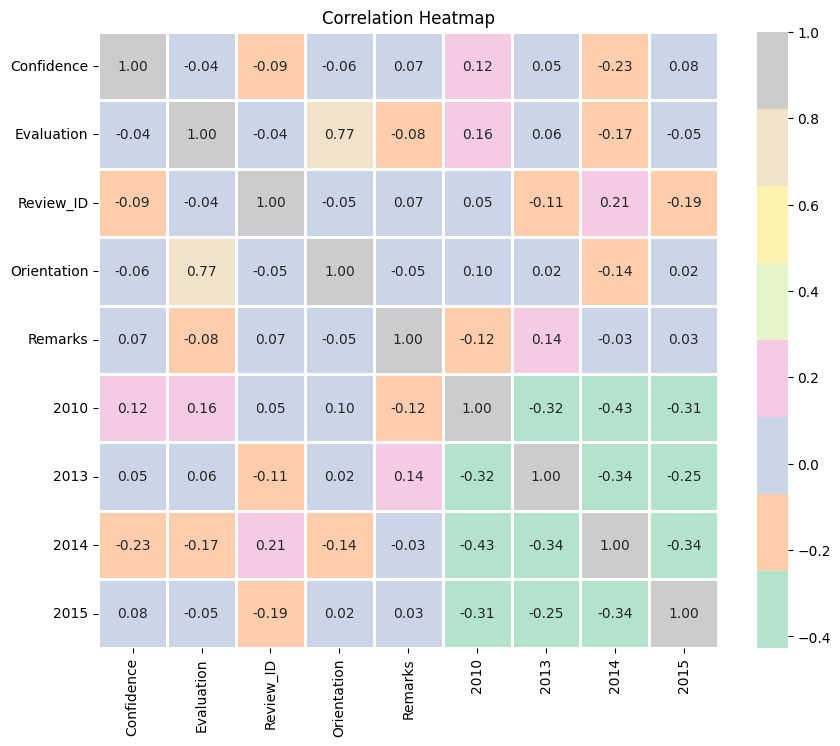

In [ ]:
#Heatmap after dummizzation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Drop the column dummies of Timespan
df = df.drop('2010', axis=1)
df = df.drop('2013',axis=1)
df = df.drop('2014', axis=1)
df = df.drop('2015', axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Confidence            403 non-null    int64 
 1   Evaluation            403 non-null    int64 
 2   Review_ID             403 non-null    int64 
 3   Language              403 non-null    object
 4   Orientation           403 non-null    int64 
 5   Remarks               403 non-null    int64 
 6   Text                  403 non-null    object
 7   Preliminary_decision  403 non-null    object
dtypes: int64(5), object(3)
memory usage: 25.3+ KB


None

**CONFIDENCE AND REMARKS FEATURES**

In [ ]:
#drop the Confidence, Remarks columns because has negative correlation
df = df.drop('Confidence',axis=1)
df = df.drop('Remarks',axis=1)
print(df.shape)

(403, 6)


**REVIEW_ID FEATURE**

<Axes: xlabel='Review_ID', ylabel='Evaluation'>

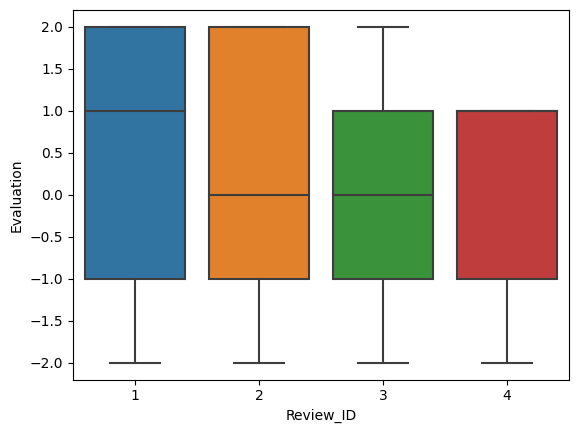

In [ ]:
#Boxplot
sns.boxplot(x='Review_ID', y='Evaluation', data= df)

In [ ]:
#Dummizzation of Review_ID feature
review_dummies = pd.get_dummies(df['Review_ID'])
review_dummies.columns = ['R-1','R-2','R-3','R-4']

df = df.drop('Review_ID',axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
df = pd.concat([df,review_dummies],axis=1)
print(df.shape)

(403, 9)


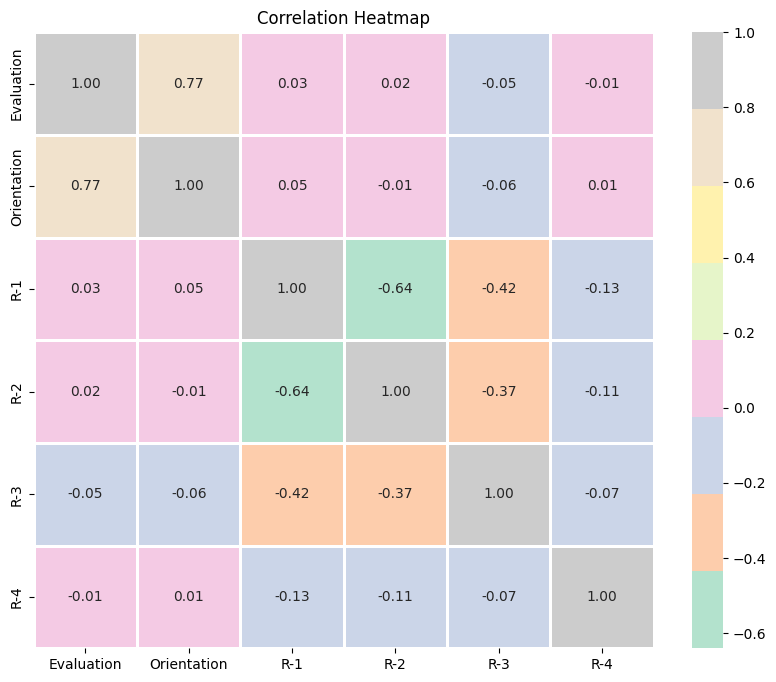

In [ ]:
#Heatmap after dummizzation of Review ID
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Drop the column 'Review ID' because it has a negative or low correlation to Evaluation feature
df = df.drop(['R-1','R-2','R-3','R-4'],axis=1)

#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
print(df.shape)

(403, 5)


**LANGUAGE FEATURE**

<Axes: xlabel='Language', ylabel='Evaluation'>

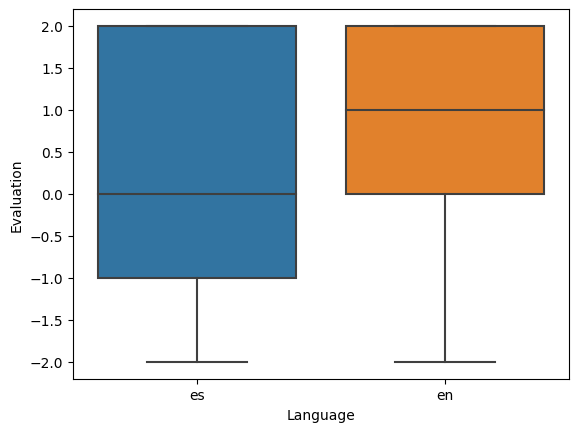

In [ ]:
#Boxplot
sns.boxplot(x='Language', y='Evaluation', data= df)

In [ ]:
#Dummy Variables for Language feature
lang_dummies= pd.get_dummies(df['Language'])

df = df.drop('Language',axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
df = pd.concat([df,lang_dummies],axis=1)

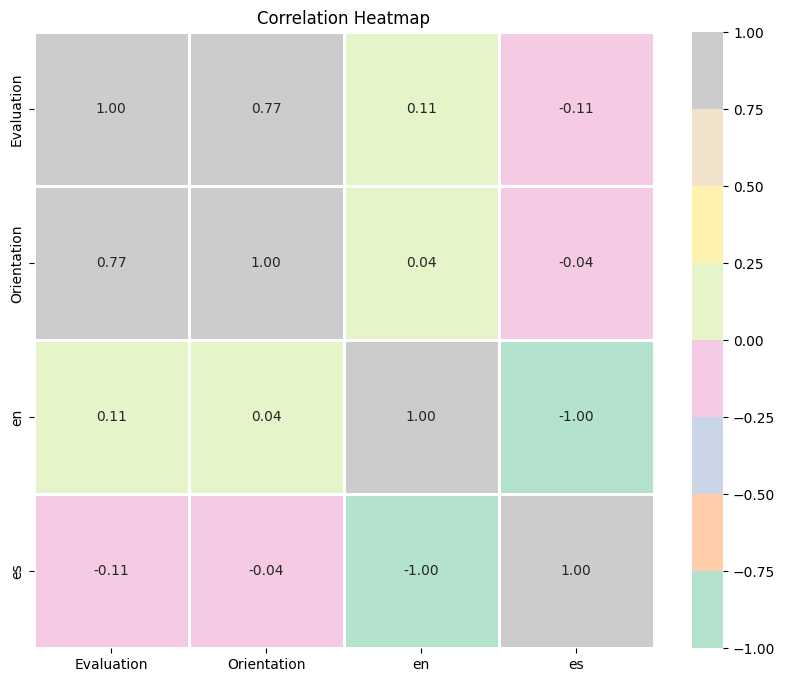

In [ ]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Check how many papers are written in english
print("Number of paper written in English = ",(df['en']==1).sum())

Number of paper written in English =  17


In [ ]:
#The dataset is unbalanced respect the language
df = df.drop(df[df['en']==1].index,axis=0,inplace=False)
df = df.drop('en',axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Evaluation            386 non-null    int64 
 1   Orientation           386 non-null    int64 
 2   Text                  386 non-null    object
 3   Preliminary_decision  386 non-null    object
 4   es                    386 non-null    uint8 
dtypes: int64(2), object(2), uint8(1)
memory usage: 12.6+ KB
None
(386, 5)


In [ ]:
#I can drop the feature 'es' because all sample in this column are equal to '1'
df = df.drop('es',axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
print(df.shape)
print(df.head())

(386, 4)
   Evaluation  Orientation                                               Text  \
0           1            0  - El artículo aborda un problema contingente y...   
1           1            1  El artículo presenta recomendaciones prácticas...   
2           1            1  - El tema es muy interesante y puede ser de mu...   
3           2            1  Se explica en forma ordenada y didáctica una e...   
4           2            0                                                      

  Preliminary_decision  
0               accept  
1               accept  
2               accept  
3               accept  
4               accept  


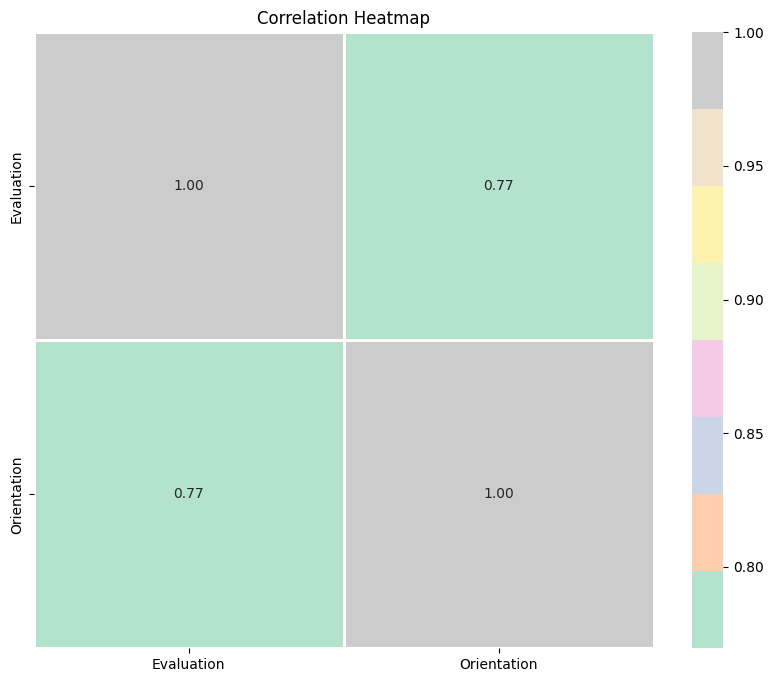

In [ ]:
#Heatmap after dummizzation and drop
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

**PRELIMINARY DECISION FEATURE**

<Axes: xlabel='Preliminary_decision', ylabel='Evaluation'>

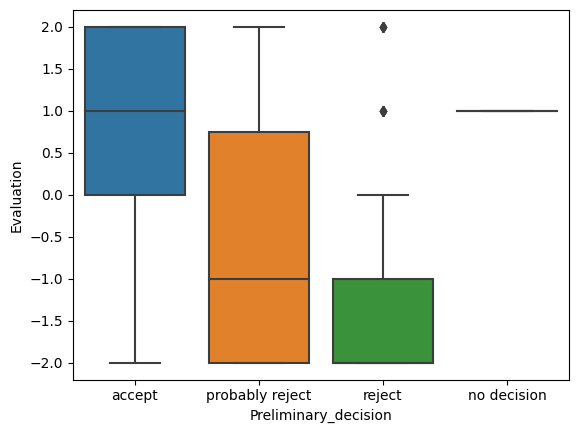

In [ ]:
#Boxplot
sns.boxplot(x='Preliminary_decision', y='Evaluation', data= df)

In [ ]:
#Dummy Variables for preliminary decision features
dec_dummies = pd.get_dummies(df['Preliminary_decision'])

df = df.drop('Preliminary_decision',axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
display(df.info())
df = pd.concat([df,dec_dummies],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Evaluation   386 non-null    int64 
 1   Orientation  386 non-null    int64 
 2   Text         386 non-null    object
dtypes: int64(2), object(1)
memory usage: 9.2+ KB


None

In [ ]:
#Check the column of Preliminary decision feature after dummization
print("The number of Paper accept are = " ,df['accept'].sum())
print("The number of Paper rejected are = " ,df['reject'].sum())
print("The number of Paper no decision are = " ,df['no decision'].sum())
print("The number of Paper probably rejected are = ",df['probably reject'].sum())

The number of Paper accept are =  246
The number of Paper rejected are =  121
The number of Paper no decision are =  1
The number of Paper probably rejected are =  18


In [ ]:
#Drop the elements associated to no decision, probably reject
df = df.drop(df[df['no decision']==1].index, axis=0, inplace=False)
df = df.drop('no decision',axis=1)

df = df.drop(df[df['probably reject']==1].index, axis=0, inplace=False)
df = df.drop('probably reject',axis=1)

#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Evaluation   367 non-null    int64 
 1   Orientation  367 non-null    int64 
 2   Text         367 non-null    object
 3   accept       367 non-null    uint8 
 4   reject       367 non-null    uint8 
dtypes: int64(2), object(1), uint8(2)
memory usage: 9.4+ KB


None

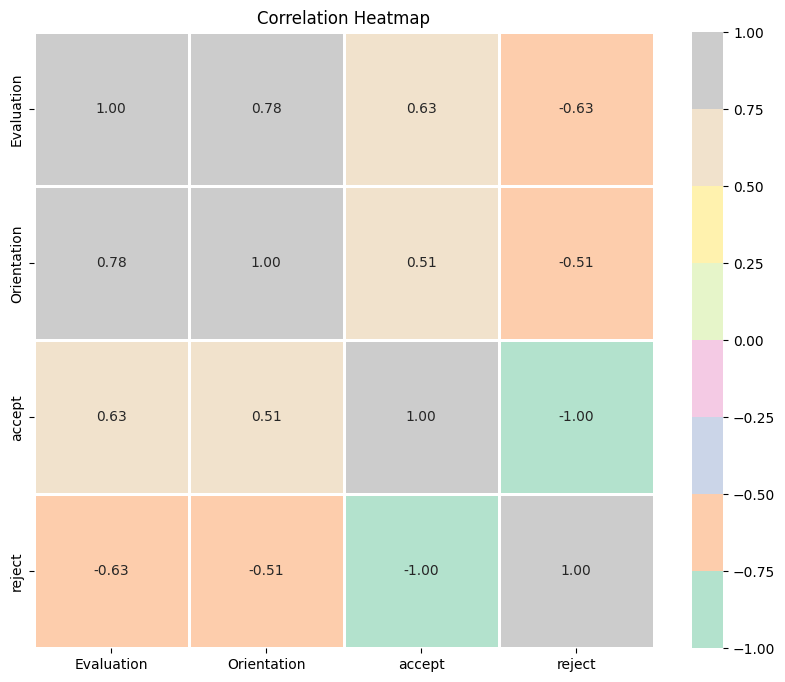

In [ ]:
#Heatmap after dummizzation and drop
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Drop the column reject that are not necessary because paper have accept=1 or accept=0
df = df.drop('reject',axis=1)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
print(df.shape)

(367, 4)


Text(0, 0.5, 'Sample')

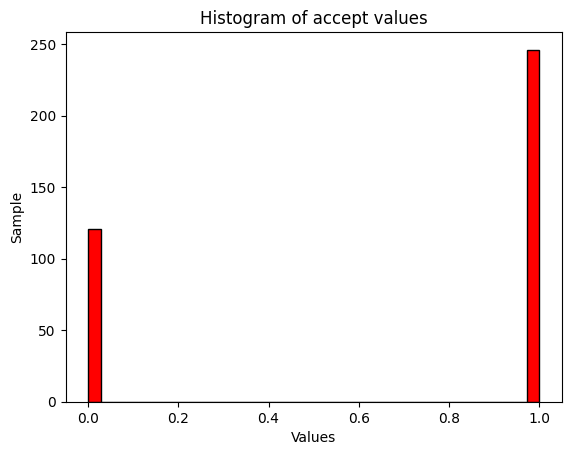

In [ ]:
#Histogram to evaluate the distribution of accept values
plt.hist(df['accept'], color = 'red', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of accept values')
plt.xlabel('Values')
plt.ylabel('Sample')

<Axes: xlabel='accept', ylabel='Evaluation'>

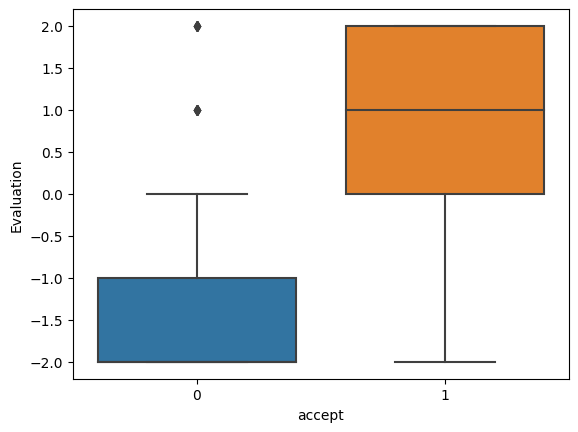

In [ ]:
#Boxplot
sns.boxplot(x='accept', y='Evaluation', data= df)

In [ ]:
#Remove the outliers
df = df.drop(df[(df['accept']==0) & (df['Evaluation']>0)].index,axis=0, inplace=False)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
print(df.shape)

(356, 4)


In [ ]:
#Follow the pattern of the data
print("Accept value that have Evaluation less than 0: ",df['accept'][(df['accept']==1) & (df['Evaluation']<0)].sum())
print("Total number of Accept value: ",df['accept'][(df['accept']==1)].sum())
df = df.drop(df[(df['accept']==1) & (df['Evaluation']<0)].index,axis=0, inplace=False)
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
print(df.shape)

Accept value that have Evaluation less than 0:  37
Total number of Accept value:  246
(319, 4)


count    319.000000
mean       0.332288
std        1.486604
min       -2.000000
25%       -1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Evaluation, dtype: float64


<Axes: xlabel='accept', ylabel='Evaluation'>

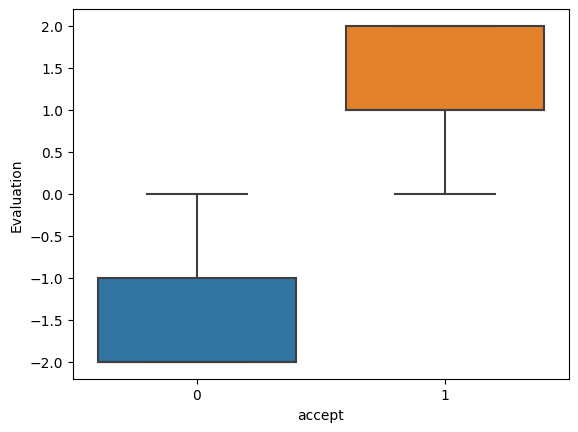

In [ ]:
#Label count and visualization after drop
print(df['Evaluation'].describe())
#Boxplot
sns.boxplot(x='accept', y='Evaluation', data= df)

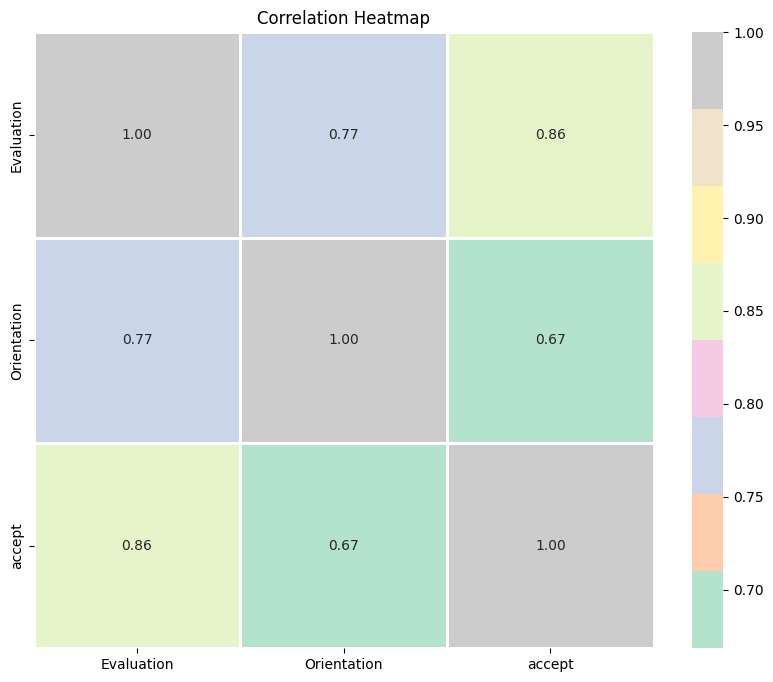

In [ ]:
#Heatmap after drop
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

**ORIENTATION FEATURE**

Text(0, 0.5, 'Sample')

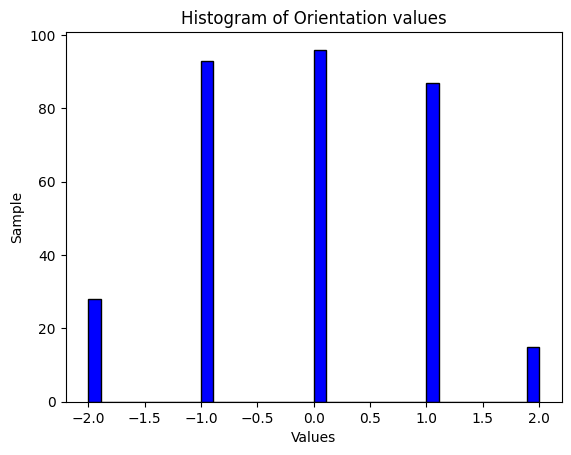

In [ ]:
#Histogram to evaluate the distribution of orientation values
plt.hist(df['Orientation'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Orientation values')
plt.xlabel('Values')
plt.ylabel('Sample')

<Axes: xlabel='Orientation', ylabel='Evaluation'>

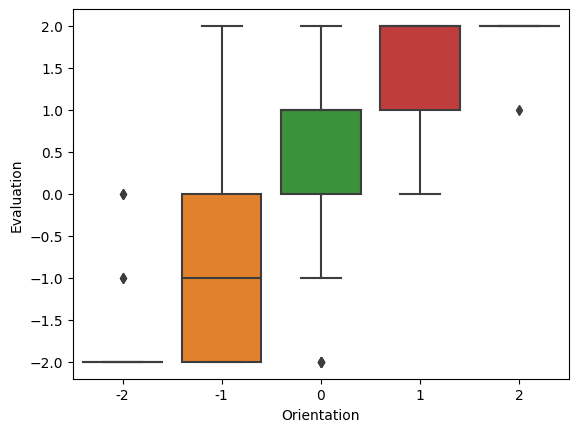

In [ ]:
#Boxplot
sns.boxplot(x='Orientation', y='Evaluation', data= df)

In [ ]:
#Drop the outliers
df = df.drop(df[(df['Orientation']==2) & (df['Evaluation']==1)].index,axis=0,inplace=False)#Outlier equals to 1
df = df.drop(df[(df['Orientation']==0) & (df['Evaluation']==-2)].index,axis=0,inplace=False)#Outliers equal to -2
df = df.drop(df[(df['Orientation']==-2) & (df['Evaluation']==0)].index,axis=0,inplace=False)#Outliers equal to 0
df = df.drop(df[(df['Orientation']==-2) & (df['Evaluation']==-1)].index,axis=0,inplace=False)#Outliers equal to -1

#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
print(df.shape)

(309, 4)


In [ ]:
#Follow the pattern of data
print("Evaluation value more than 0 for Orientation equal to -1: ",df['Orientation'][(df['Orientation']==-1) & (df['Evaluation']>0)].count())
print("Evaluation value less than 0 for Orientation equal to 0: ",df['Orientation'][(df['Orientation']==0) & (df['Evaluation']<0)].count())
print("Evaluation value less than 1 for Orientation equal to 1: ",df['Orientation'][(df['Orientation']==1) & (df['Evaluation']<1)].count())

df = df.drop(df[(df['Orientation']==-1) & (df['Evaluation']>0)].index,axis=0,inplace=False)
df = df.drop(df[(df['Orientation']==0) & (df['Evaluation']<0)].index,axis=0,inplace=False)
df = df.drop(df[(df['Orientation']==1) & (df['Evaluation']<1)].index,axis=0,inplace=False)

Evaluation value more than 0 for Orientation equal to -1:  10
Evaluation value less than 0 for Orientation equal to 0:  7
Evaluation value less than 1 for Orientation equal to 1:  5


<Axes: xlabel='Orientation', ylabel='Evaluation'>

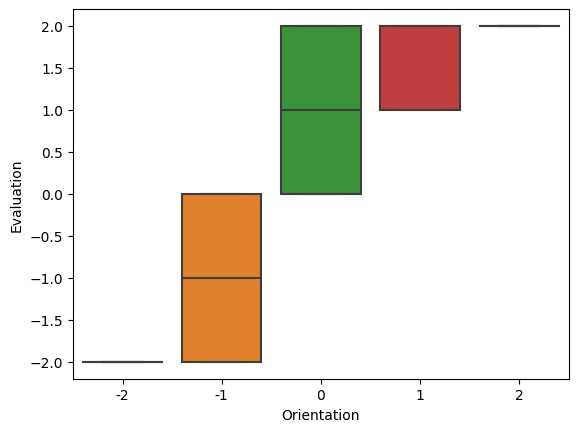

In [ ]:
#Boxplot
sns.boxplot(x='Orientation', y='Evaluation', data= df)

Text(0, 0.5, 'Sample')

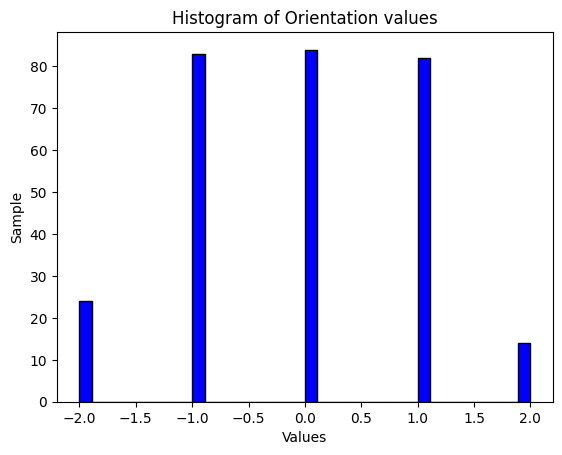

In [ ]:
#Histogram to evaluate the distribution of orientation values
plt.hist(df['Orientation'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Orientation values')
plt.xlabel('Values')
plt.ylabel('Sample')

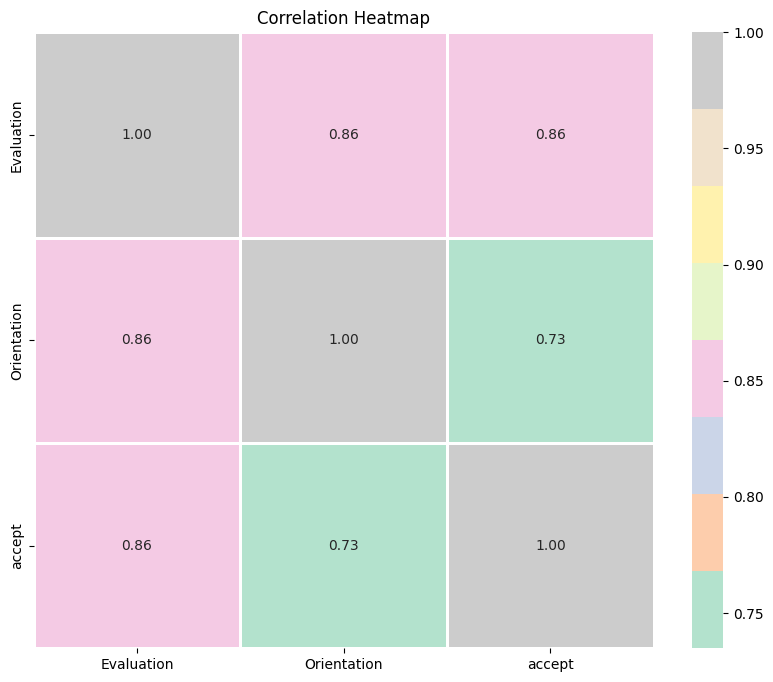

In [ ]:
#Heatmap after drop
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Orientation', ylabel='accept'>

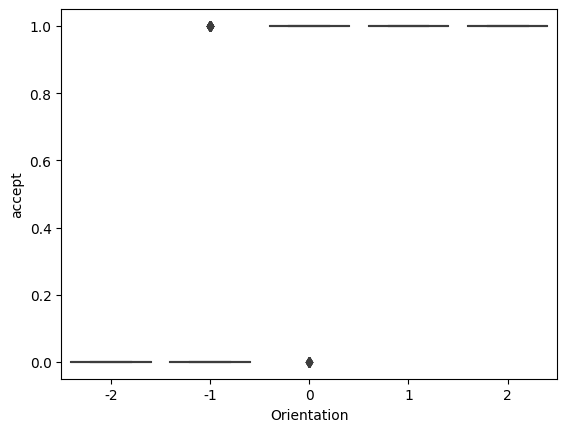

In [ ]:
#Boxplot
sns.boxplot(x='Orientation', y='accept', data= df)

In [ ]:
#Remove outliers
df = df.drop(df[(df['Orientation']==0) & (df['accept']==0)].index,axis=0,inplace=False)
df = df.drop(df[(df['Orientation']==-1) & (df['accept']==1)].index,axis=0,inplace=False)

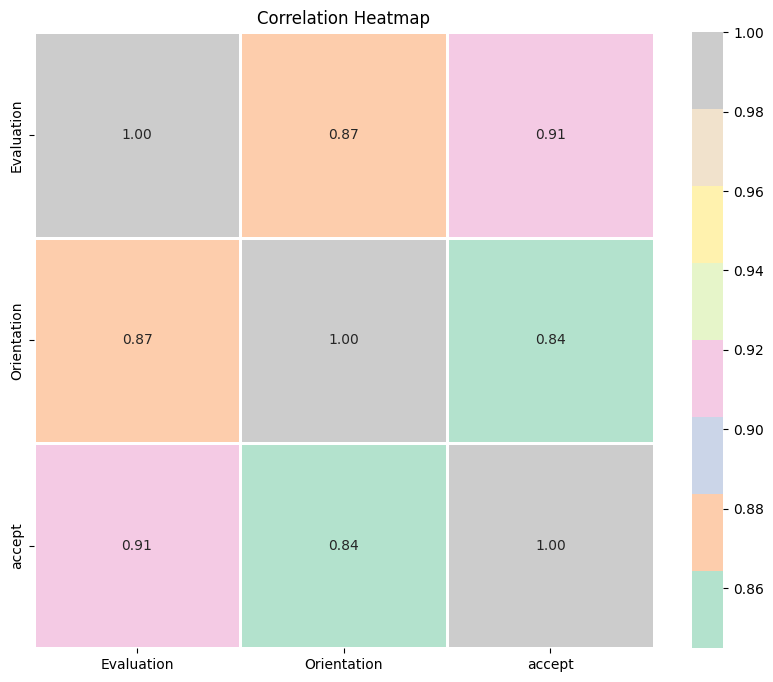

In [ ]:
#Heatmap after drop
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Sample')

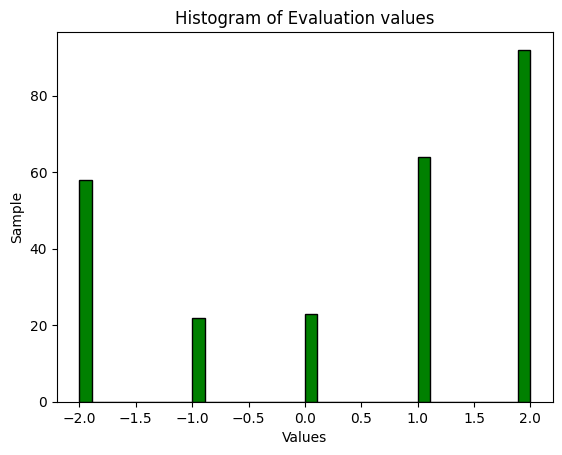

In [ ]:
#Histogram to evaluate the distribution of Evaluation values
plt.hist(df['Evaluation'], color = 'green', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Evaluation values')
plt.xlabel('Values')
plt.ylabel('Sample')

**TEXT FEATURE**

In [ ]:
#Step to clean the Text feature
# 1. Remove punctuations
# 2. Tokenization: Convert a sentence into a list of words
# 3. Remove stopwords
# 4. Lemmatization/Stemming: Transform any word form to its root word

In [ ]:
#Drop the empty text values
display(df['Text'].eq("").sum())
df = df.drop(df[df['Text'].eq("")].index,axis=0,inplace=False)
display(df.shape)

5

(254, 4)

In [ ]:
#Reset the index of the dataframe
df.reset_index(drop=True,inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Evaluation   254 non-null    int64 
 1   Orientation  254 non-null    int64 
 2   Text         254 non-null    object
 3   accept       254 non-null    uint8 
dtypes: int64(2), object(1), uint8(1)
memory usage: 6.3+ KB


None

In [ ]:
##### NLP libraries ######
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import re
from sklearn.decomposition import TruncatedSVD
import nltk
import string

text_col = df['Text']

#Function to remove the punctuation
def remove_punct(text):
    # Remove punctuation characters
    text = "".join([char for char in text if char not in string.punctuation])
    # Remove numbers
    text = re.sub('[0-9]+', '', text)
    return text

text_col = text_col.apply(lambda x: remove_punct(x))


# Tokenize the text by splitting into words
def tokenization(text):
    text = re.split('\W+', text)
    return text

text_col = text_col.apply(lambda x: tokenization(x))


#Remove stopwords using NLTK stopwords list
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('spanish')

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

text_col = text_col.apply(lambda x: remove_stopwords(x))


# Perform stemming using Porter Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

text_col = text_col.apply(lambda x: stemming(x))


# Perform lemmatization using WordNet Lemmatizer
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

text_col = text_col.apply(lambda x: lemmatizer(x))

# Join the tokenized words to create clean text
text_col = text_col.apply(lambda x: ' '.join(x))

display(text_col.head(10))
df = df.drop('Text',axis=1)
df = pd.concat([df,text_col],axis=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0     el artículo aborda problema contingent releva...
1    el artículo presenta recomendacion práctica de...
2     el tema interesant pued ser mucha ayuda guía ...
3    se explica forma ordenada didáctica experienci...
4    lo autor describen metodología desarrollar for...
5    est trabajo propon nuevo enfoqu basado apoyar ...
6    se realiza trabajo modelamiento encriptación c...
7    novedosa propuesta bien estructurada correctam...
8    el tema interesant bien estructurado refier di...
9    de alto perfil técnico aport temática demasiad...
Name: Text, dtype: object

In [ ]:
display(df.head(10))
display(df.shape)

,Evaluation,Orientation,accept,Text
0,1,0,1,el artículo aborda problema contingent releva...
1,1,1,1,el artículo presenta recomendacion práctica de...
2,1,1,1,el tema interesant pued ser mucha ayuda guía ...
3,2,1,1,se explica forma ordenada didáctica experienci...
4,2,0,1,lo autor describen metodología desarrollar for...
5,2,1,1,est trabajo propon nuevo enfoqu basado apoyar ...
6,2,2,1,se realiza trabajo modelamiento encriptación c...
7,2,1,1,novedosa propuesta bien estructurada correctam...
8,2,0,1,el tema interesant bien estructurado refier di...
9,2,1,1,de alto perfil técnico aport temática demasiad...


(254, 4)

#**MODEL SELECTION,MODEL ASSESMENT AND TEST**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso,  Ridge, LogisticRegression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [ ]:
#Divide sample to Label
X,y = df.drop('Evaluation',axis=1), df['Evaluation']
#Divided the data in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle= True)

#Divided the data in train and development set
X_tr, X_dev, y_tr, y_dev = train_test_split(X_train, y_train, test_size=0.125, random_state=1, shuffle= True)#0.8 * 0.125 = 0.1

#Reset the index of the train and dev set
X_tr.reset_index(drop=True,inplace=True)
X_dev.reset_index(drop=True,inplace=True)

#Display the train set shape and head
display(X_tr.shape)
display(X_dev.shape)
display(X_tr.head(10))

(177, 3)

(26, 3)

,Orientation,accept,Text
0,1,1,muy buen artículo comprend ubicación espaci ob...
1,-1,0,en práctica realiza comunicación utilizando es...
2,0,1,lo autor describen metodología desarrollar for...
3,0,1,el paper describ contexto actual uso tecnologí...
4,1,1,est artículo presenta desarrollo sistema detec...
5,1,1,de valor dada relevancia temática actualidad ...
6,-1,0,el trabajo presenta método algorítmico clasifi...
7,2,1,el trabajo un análisi empírico recomendacion c...
8,1,1,el trabajo según revisor presenta contribución...
9,-2,0,no queda claro si artículo presenta propuesta ...


In [ ]:
# Initialize a TF-IDF Vectorizer with specific settings
tfidfvectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=2000)

In [ ]:
# Transform the 'original_text' into TF-IDF features
Y = tfidfvectorizer.fit_transform(list(X_tr['Text']))
T = tfidfvectorizer.transform(list(X_dev['Text']))

# Apply Truncated Singular Value Decomposition (SVD) for dimensionality reduction
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X = svd.fit_transform(Y)
Z = svd.transform(T)


# Convert the SVD output into a DataFrame
X = pd.DataFrame(data=X, index=range(X.shape[0]), columns=range(X.shape[1]))
Z = pd.DataFrame(data=Z, index=range(Z.shape[0]), columns=range(Z.shape[1]))

X_tr = X_tr.drop('Text',axis=1,inplace=False)
X.columns = X.columns.astype(str)
X_tr = pd.concat([X_tr,X],axis=1)

X_dev = X_dev.drop('Text',axis=1,inplace=False)
Z.columns = Z.columns.astype(str)
X_dev = pd.concat([X_dev,Z],axis=1)

#Display the sets shape after tf-idf vectorization and svd reduction
display(X_tr.shape)
display(X_dev.shape)
#Display train and dev label info
display(y_tr.shape)
display(y_dev.shape)

(177, 52)

(26, 52)

(177,)

(26,)

# CLASSIFICATION

**LOGISTIC REGRESSION**

In [ ]:
#Model
model = LogisticRegression()
#Param
param_list = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
#GridCV
gridCV = GridSearchCV(estimator=model, param_grid=param_list, cv=5)

#Fit the model
gridCV.fit(X_tr, y_tr)

#Model Assesment
y_pred = gridCV.predict(X_dev)
score = f1_score(y_dev,y_pred,average='micro')

#Best estimator
print("Best estimator paramateres for Logistic Regression: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score: ", score)


Best estimator paramateres for Logistic Regression:  {'C': 0.1, 'penalty': 'l2'}
Mean validation score:  0.6161904761904762
Development score:  0.6923076923076923


**KNN CLASSIFIER**

In [ ]:
#Model
knn = KNeighborsClassifier()

#Param list
k_range = list(range(1,31))
param_list = dict(n_neighbors=k_range)

#GridCV
gridCV = GridSearchCV(estimator=knn, param_grid=param_list, cv=10)

#Fit the model
gridCV.fit(X_tr, y_tr)


#Model Assesment
y_pred = gridCV.predict(X_dev)
score = f1_score(y_dev,y_pred,average='micro')

#Print the best estimator
print("Best estimator parameter for KNN Classifier: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score: ", score)


Best estimator parameter for KNN Classifier:  {'n_neighbors': 14}
Mean validation score:  0.6725490196078432
Development score:  0.6923076923076923


**SVM CLASSIFIER**

In [ ]:
#Model
model = SVC()

#Param
param_list = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

#GridCV
gridCV = GridSearchCV(estimator=model, param_grid=param_list, cv=5)

#Fit the model
gridCV.fit(X_tr, y_tr)


#Model Assesment
y_pred = gridCV.predict(X_dev)
score = f1_score(y_dev,y_pred,average='micro')

#Parameter
print("Best estimator paramaters for SVC: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score: ", score)


Best estimator paramaters for SVC:  {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Mean validation score:  0.6326984126984128
Development score:  0.6153846153846154


**NAIVE BAYES**

In [ ]:
#Model
model = GaussianNB()

#Param
param_list = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#GridCV
gridCV = GridSearchCV(estimator=model, param_grid=param_list, cv=5)

#Fit the model
gridCV.fit(X_tr, y_tr)


#Model Assesment
y_pred = gridCV.predict(X_dev)
score = f1_score(y_dev,y_pred,average='micro')

#Parameter
print("Best estimator paramaters for Gaussian NB: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score: ", score)


Best estimator paramaters for Gaussian NB:  {'var_smoothing': 0.15199110829529336}
Mean validation score:  0.621904761904762
Development score:  0.6923076923076923


**MLP CLASSIFIER**


In [ ]:
#MODEL
nn = MLPClassifier()

#Param
param_list = {"hidden_layer_sizes": [1,100], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.05]}
#GridCV
gridCV = GridSearchCV(estimator=nn, param_grid=param_list, cv=5)

#Fit the model
gridCV.fit(X_tr, y_tr)


#Model Assesment
y_pred = gridCV.predict(X_dev)
score = f1_score(y_dev,y_pred,average='micro')

#Print the best estimator
print("Best estimator parameters for MLP Classifier: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score: ", score)

Best estimator parameters for MLP Classifier:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 100, 'solver': 'adam'}
Mean validation score:  0.6274603174603175
Development score:  0.6538461538461539


**TEST ON THE BEST ESTIMATOR**

In [ ]:
#Reset the index of the train and test set
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

# Transform the 'original_text' into TF-IDF features
Y = tfidfvectorizer.fit_transform(list(X_train['Text']))
T = tfidfvectorizer.transform(list(X_test['Text']))

# Apply Truncated Singular Value Decomposition (SVD) for dimensionality reduction
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
X = svd.fit_transform(Y)
Z = svd.transform(T)


# Convert the SVD output into a DataFrame
X = pd.DataFrame(data=X, index=range(X.shape[0]), columns=range(X.shape[1]))
Z = pd.DataFrame(data=Z, index=range(Z.shape[0]), columns=range(Z.shape[1]))

X_train = X_train.drop('Text',axis=1,inplace=False)
X.columns = X.columns.astype(str)
X_train = pd.concat([X_train,X],axis=1)

X_test = X_test.drop('Text',axis=1,inplace=False)
Z.columns = Z.columns.astype(str)
X_test = pd.concat([X_test,Z],axis=1)

#Display the sets shape after tf-idf vectorization and svd reduction
display(X_train.shape)
display(X_test.shape)
#Display train and dev label info
display(y_train.shape)
display(y_test.shape)

(203, 52)

(51, 52)

(203,)

(51,)

Precision Score: 0.70588
Recall Score: 0.70588
Accuracy Score: 0.70588
F1 Score: 0.70588


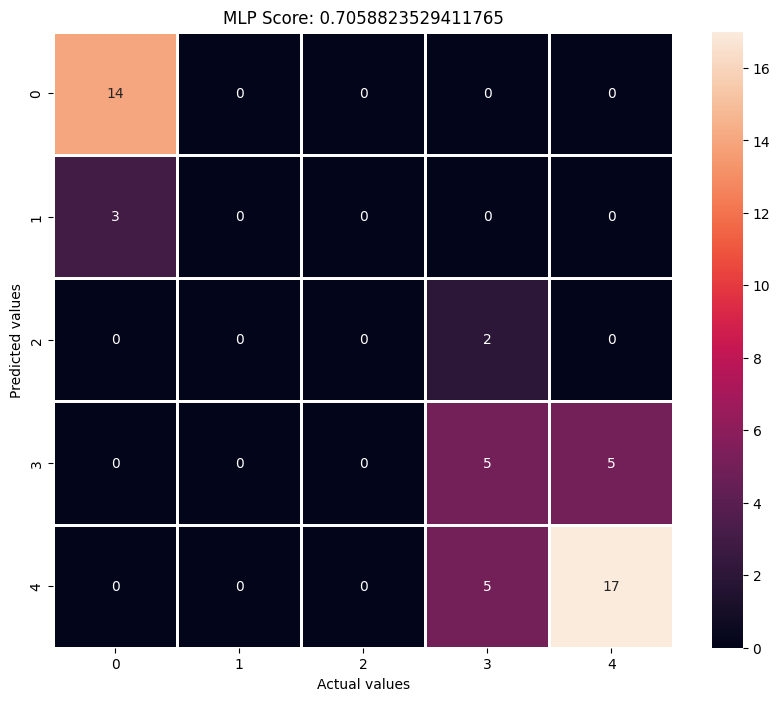

In [ ]:
#Model
model = GaussianNB(var_smoothing=0.15199110829529336)

#Fit the model
model.fit(X_train,y_train)

#Prediction of the test label by the best estimator
y_pred = model.predict(X_test)

#Score
score_acc = accuracy_score(y_test,y_pred)
score = f1_score(y_test,y_pred,average='micro')
score_p = precision_score(y_test,y_pred,average='micro')
score_r = recall_score(y_test,y_pred,average='micro')
print("Precision Score: {:.5f}".format(score_p))
print("Recall Score: {:.5f}".format(score_r))
print("Accuracy Score: {:.5f}".format(score_acc))
print("F1 Score: {:.5f}".format(score))


#Show the result with confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)


#Heatmap of confusion_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, linewidths=2)
plt.title('MLP Score: {}'.format(score))
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

Precision Score: 0.74510
Recall Score: 0.74510
Accuracy Score: 0.74510
F1 Score: 0.74510


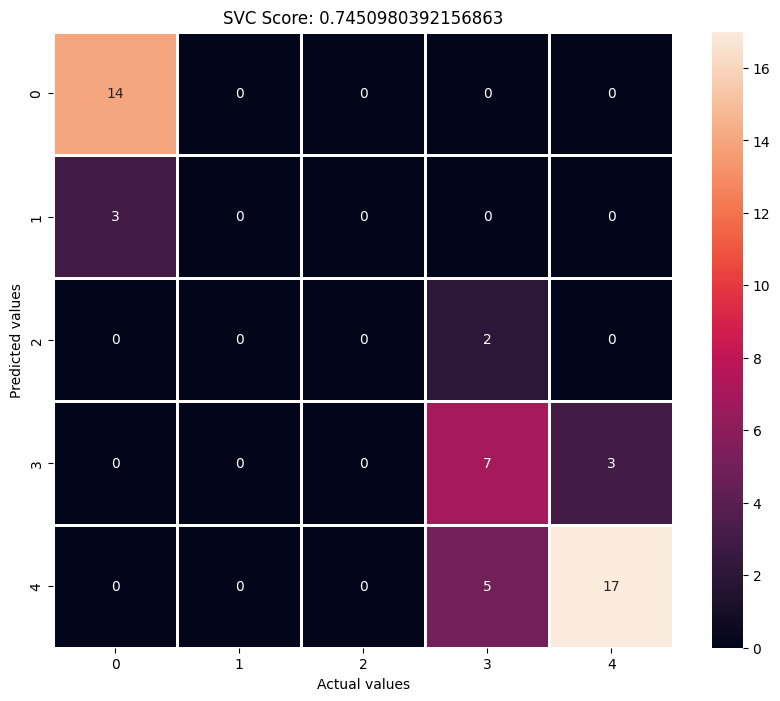

In [ ]:
#Model
model = SVC(C= 10, gamma= 0.1, kernel= 'rbf')

#Fit the model
model.fit(X_train,y_train)

#Prediction of the test label by the best estimator
y_pred = model.predict(X_test)

#Score
score_acc = accuracy_score(y_test,y_pred)
score = f1_score(y_test,y_pred,average='micro')
score_p = precision_score(y_test,y_pred,average='micro')
score_r = recall_score(y_test,y_pred,average='micro')
print("Precision Score: {:.5f}".format(score_p))
print("Recall Score: {:.5f}".format(score_r))
print("Accuracy Score: {:.5f}".format(score_acc))
print("F1 Score: {:.5f}".format(score))


#Show the result with confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)


#Heatmap of confusion_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, linewidths=2)
plt.title('SVC Score: {}'.format(score))
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# REGRESSION

**LASSO REGRESSION**

In [ ]:
#LASSO Model
model= Lasso()
#Param
param_list = {'alpha': np.logspace(-4,4,10)}
#GridCV
gridCV = GridSearchCV(estimator=model, param_grid=param_list, cv=10)

#Fit the model
gridCV.fit(X_tr, y_tr)
#Model Assesment
y_pred = gridCV.predict(X_dev)
score = r2_score(y_dev,y_pred)

#Parameters and score
print("Best estimator parameters for LASSO Regression: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score:", score)

Best estimator parameters for LASSO Regression:  {'alpha': 0.005994842503189409}
Mean validation score:  0.8236403071856131
Development score: 0.8862795374833372


RIDGE REGRESSION

In [ ]:
#Model
model = Ridge()
#Param
param_list = {'alpha': [0.001,10]}
#GridCV
gridCV = GridSearchCV(estimator=model, param_grid=param_list, cv=10)


#Fit the model
gridCV.fit(X_tr, y_tr)
#Model Assesment
y_pred = gridCV.predict(X_dev)
score = r2_score(y_dev,y_pred)

#Parameter and score
print("Best estimator parameters for RIDGE Regression: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score:", score)


Best estimator parameters for RIDGE Regression:  {'alpha': 10}
Mean validation score:  0.8117760968467044
Development score: 0.8683195710072826


**SVM REGRESSION**

In [ ]:
#Model
model = SVR()

#Param
param_list = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

#GridCV
gridCV = GridSearchCV(estimator=model, param_grid=param_list, cv=10)

#Fit the model
gridCV.fit(X_tr, y_tr)
#Model Assesment
y_pred = gridCV.predict(X_dev)
score = r2_score(y_dev,y_pred)

#Parameters and score
print("Best estimator paramaters for SVR: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score:", score)


Best estimator paramaters for SVR:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Mean validation score:  0.8268723881530887
Development score: 0.8848283517235555


**KNN REGRESSOR**

In [ ]:
#Model
knn = KNeighborsRegressor()

#Param list
k_range = list(range(1,31))
param_list = dict(n_neighbors=k_range)

#GridCV
gridCV = GridSearchCV(estimator=knn, param_grid=param_list, cv=10)


#Fit the model
gridCV.fit(X_tr, y_tr)
#Model Assesment
y_pred = gridCV.predict(X_dev)
score = r2_score(y_dev,y_pred)

#Parameter and score
print("Best estimator parameters for KNN Regressor: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score:", score)


Best estimator parameters for KNN Regressor:  {'n_neighbors': 22}
Mean validation score:  0.8184874033263787
Development score: 0.8813616764119818


**MLP REGRESSOR**

In [ ]:
#MODEL
nn = MLPRegressor()

#Param
param_list = {"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.05]}
#GridCV
gridCV = GridSearchCV(estimator=nn, param_grid=param_list, cv=10)

#Fit the model
gridCV.fit(X_tr, y_tr)
#Model Assesment
y_pred = gridCV.predict(X_dev)
score = r2_score(y_dev,y_pred)

#Parameter and score
print("Best estimator parameters for MLP Regressor: ", gridCV.best_params_)
print("Mean validation score: ", gridCV.best_score_)
print("Development score:", score)


Best estimator parameters for MLP Regressor:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': 50, 'solver': 'sgd'}
Mean validation score:  0.8079596764522753
Development score: 0.8734742569342137


**TEST ON THE BEST ESTIMATOR**

Score: 0.89710


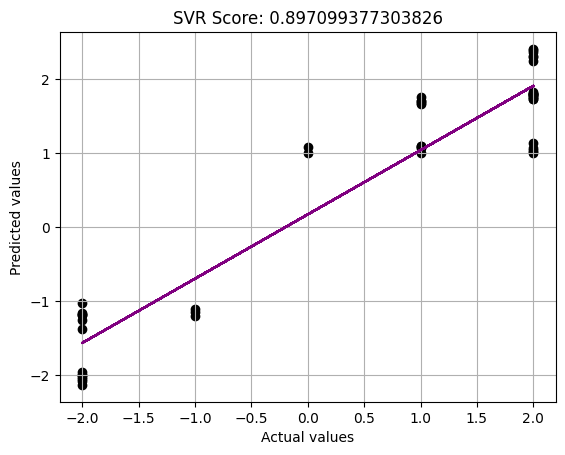

In [ ]:
#Model
model = SVR(C= 10, gamma= 0.01, kernel= 'rbf')
#Fit the model
model.fit(X_train, y_train)
#Prediction of the test label
y_pred = model.predict(X_test)


#Score
score = r2_score(y_test,y_pred)
print("Score: {:.5f}".format(score))


#Show the result with scatter plot
plt.scatter(y_test,y_pred, color='k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('SVR Score: {}'.format(score))


#calculate equation for trend line
z = np.polyfit(y_test,y_pred,1)
p = np.poly1d(z)


#add trendline
plt.plot(y_test,p(y_test), color="purple")
plt.grid()
plt.show()

Score: 0.88643


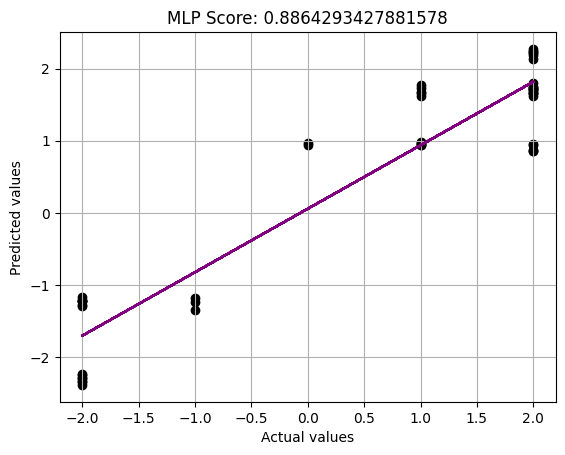

In [ ]:
#Model
model = MLPRegressor(activation= 'relu', alpha= 0.05, hidden_layer_sizes= 50, solver= 'sgd')
#Fit the model
model.fit(X_train, y_train)
#Prediction of the test label
y_pred = model.predict(X_test)


#Score
score = r2_score(y_test,y_pred)
print("Score: {:.5f}".format(score))


#Show the result with scatter plot
plt.scatter(y_test,y_pred, color='k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('MLP Score: {}'.format(score))


#calculate equation for trend line
z = np.polyfit(y_test,y_pred,1)
p = np.poly1d(z)


#add trendline
plt.plot(y_test,p(y_test), color="purple")
plt.grid()
plt.show()